In [2]:
import rasterio
import rasterio.plot
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [ ]:
src.meta
# width: row, height: column, count: band

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [5]:
src.crs
# Coordinate Reference System (CRS) of the raster

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [6]:
src.res
# Resolution (pixel size) of the raster

(90.0, 89.99579177642138)

In [7]:
src.count
# Number of bands in the raster

1

In [8]:
src.width, src.height
# Width and height of the raster in pixels

(4269, 3113)

In [9]:
src.bounds
# Bounding box of the raster in the CRS coordinates (extent of the raster)

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

In [11]:
src.dtypes
# Data type of the raster values

('int16',)

In [13]:
src.transform
# Affine transformation matrix for the raster

Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)

## Meaning of the transformation matrix (Important)
The transformation matrix consists of six parameters that control the scaling, translation, and rotation of the raster. Most rasters will have no rotation (`b`, `d` are 0), but the transformation will include the pixel size (`a`, `e`) and the geographic coordinates of the top-left pixel (`c`, `f`).

- `a`: width of a pixel in the x-direction
- `b`: row rotation (typically zero)
- `c`: x-coordinate of the upper-left corner of the upper-left pixel
- `d`: column rotation (typically zero)
- `e`: height of a pixel in the y-direction (typically negative)
- `f`: y-coordinate of the of the upper-left corner of the upper-left pixel

`a` and `e` are the pixel width and height, respectively, and `c` and `f` are the coordinates of the upper-left corner of the raster. The other coefficients are used for rotation and shearing.

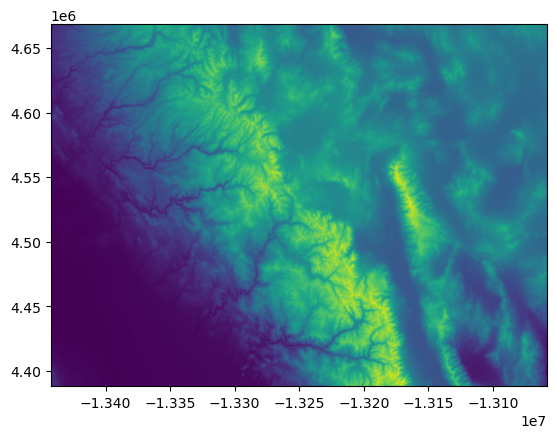

<Axes: >

In [14]:
rasterio.plot.show(src)

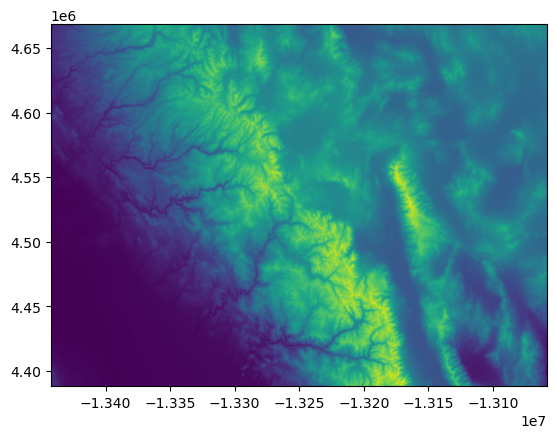

<Axes: >

In [15]:
rasterio.plot.show((src, 1))

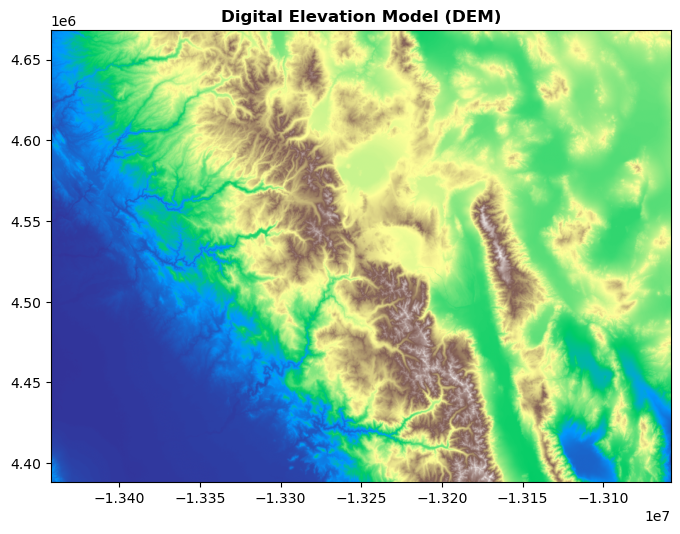

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

In [17]:
dem_bounds = (
    "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
)
gdf = gpd.read_file(dem_bounds)
gdf = gdf.to_crs(src.crs)

<Axes: title={'center': 'Digital Elevation Model (DEM)'}>

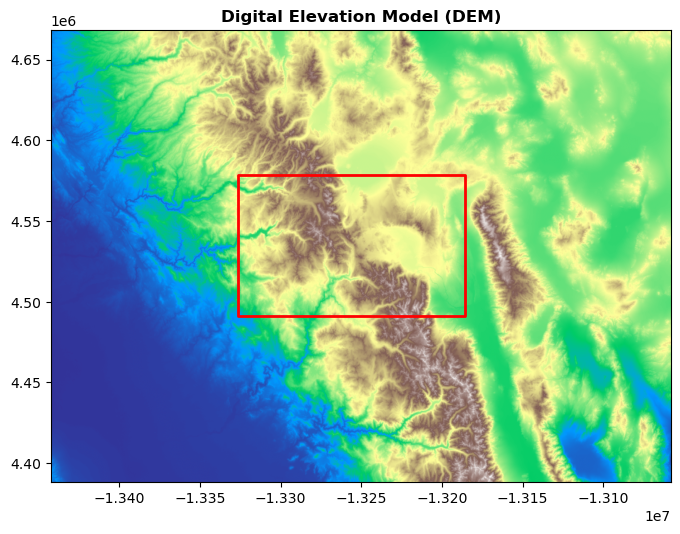

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)